In [1]:
from helpers import orr_sommerfeld_channel, primitive_channel, reject_spurious
import matplotlib.pyplot as plt
import numpy as np

In [2]:
params = {"N": 512, "streamwise wavenumber": 1.0, "Reynolds number": 10000.0}
params_high = {"N": 512*3/2, "streamwise wavenumber": 1.0, "Reynolds number": 10000.0}

os_problem = orr_sommerfeld_channel(params)
os_solver = os_problem.build_solver()
os_solver.solve_dense(os_solver.subproblems[0])
os_eigvals_low = os_solver.eigenvalues
os_problem = orr_sommerfeld_channel(params_high)
os_solver = os_problem.build_solver()
os_solver.solve_dense(os_solver.subproblems[0])
os_eigvals_high = os_solver.eigenvalues
os_inv_drift, os_eigvals  = reject_spurious(os_eigvals_low, os_eigvals_high, threshold=1e6)

prim_problem = primitive_channel(params)
prim_solver = prim_problem.build_solver()
prim_solver.solve_dense(prim_solver.subproblems[0])
prim_eigvals_low = prim_solver.eigenvalues
prim_problem = primitive_channel(params_high)
prim_solver = prim_problem.build_solver()
prim_solver.solve_dense(prim_solver.subproblems[0])
prim_eigvals_high = prim_solver.eigenvalues
prim_inv_drift, prim_eigvals  = reject_spurious(prim_eigvals_low, prim_eigvals_high, threshold=1e6)

2025-04-19 15:58:45,908 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 8.0e+00/s
2025-04-19 15:58:48,008 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 6.8e+00/s
2025-04-19 15:58:53,580 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.4e+01/s
2025-04-19 15:59:27,639 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.1e+01/s


The most unstable mode with c = 0.23752649 + 0.00373967i (reciprocal eigenvalue drift ratios = 3.085e+09)


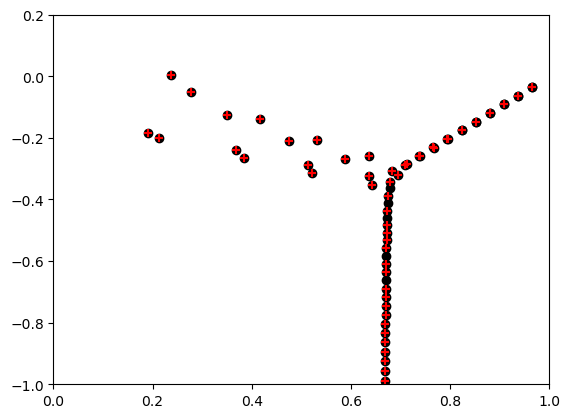

In [7]:
fig, ax = plt.subplots()
sc = ax.scatter(prim_eigvals.real, prim_eigvals.imag, color='black')
sc = ax.scatter(os_eigvals.real, os_eigvals.imag, color='red', marker='+')
ax.set_xlim(0, 1)
ax.set_ylim(-1, 0.2)
iloc = np.argmax(os_eigvals.imag)
cmax = os_eigvals[iloc]
print(f'The most unstable mode with c = {cmax.real:.8f} + {cmax.imag:.8f}i (reciprocal eigenvalue drift ratios = {os_inv_drift[iloc]:.3e})')

In [8]:
os_solver.eigenvalues.shape

(772,)

In [10]:
os_solver.eigenvectors.shape

(772, 772)

In [11]:
512*3/2

768.0

In [4]:
os_eigvals.size

305

In [5]:
prim_eigvals.size

307

The most unstable mode with c = 0.23752649 + 0.00373967i (reciprocal eigenvalue drift ratios = 1.982e+11)


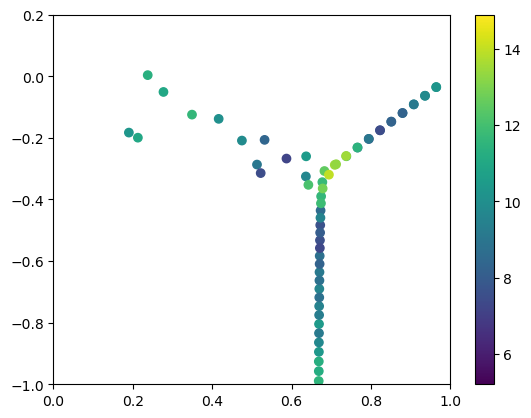

In [20]:
fig, ax = plt.subplots()
sc = ax.scatter(prim_eigvals.real, prim_eigvals.imag, c=np.log10(prim_inv_drift))
fig.colorbar(sc, ax=ax)
ax.set_xlim(0, 1)
ax.set_ylim(-1, 0.2)
iloc = np.argmax(prim_eigvals.imag)
cmax = prim_eigvals[iloc]
print(f'The most unstable mode with c = {cmax.real:.8f} + {cmax.imag:.8f}i (reciprocal eigenvalue drift ratios = {prim_inv_drift[iloc]:.3e})')

$$
\begin{equation}
\frac{d^4 v}{d y^4}-2 \alpha^2 \frac{d^2 v}{d y^2}+\alpha^4 v-i \alpha R\left[(\bar{u}-c)\left(\frac{d^2 v}{d y^2}-\alpha^2 v\right)-\frac{d^2 \bar{u}}{d y^2} v\right]=0
\end{equation}
$$

In [8]:
os_solver = os_problem.build_solver()
os_solver.solve_dense(os_solver.subproblems[0])
os_eigvals = os_solver.eigenvalues

2025-04-19 14:48:34,249 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.8e+01/s


In [3]:
prim_problem = primitive_channel(params)

In [4]:
prim_solver = prim_problem.build_solver()
prim_solver.solve_dense(prim_solver.subproblems[0])

2025-04-19 14:52:13,030 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 0s, Remaining: 0s, Rate: 1.8e+01/s


In [5]:
prim_eigvals = prim_solver.eigenvalues

In [7]:
prim_eigvals.shape

(388,)